In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

In [14]:
agg_path = Path('../results/ramps_2019.csv')
crosswalk_path = Path('../results/ramps_2019_crosswalk_with_IDs.csv')
assert agg_path.exists()
assert crosswalk_path.exists()

In [15]:
aggs = pd.read_csv(agg_path)
crosswalk = pd.read_csv(crosswalk_path)

In [16]:
aggs.head()

,component_id,sum_of_max_gross_load_mw,max_of_sum_gross_load_mw,max_ramp,min_ramp,idxmax_ramp,idxmin_ramp,max_abs_ramp,idxmax_abs_ramp,EIA_UNIT_TYPE,capacity_CAMD,capacity_EIA,simple_CAMD_FUEL_TYPE_via_capacity,simple_EIA_FUEL_TYPE_via_capacity,simple_EIA_UNIT_TYPE,ramp_factor_CAMD,ramp_factor_EIA,ramp_factor_sum_max,ramp_factor_max_sum
0,0,87.0,87.0,41.0,-54.0,2019-07-17 15:00:00+00:00,2019-05-24 23:00:00+00:00,54.0,2019-05-24 23:00:00+00:00,"('ST',)",153.1,153.1,gas,gas,steam_turbine,0.352711,0.352711,0.620690,0.620690
1,1,84.0,84.0,28.0,-74.0,2019-05-24 16:00:00+00:00,2019-05-23 22:00:00+00:00,74.0,2019-05-23 22:00:00+00:00,"('ST',)",153.1,153.1,gas,gas,steam_turbine,0.483344,0.483344,0.880952,0.880952
2,2,382.0,382.0,181.0,-169.0,2019-08-09 20:00:00+00:00,2019-07-19 19:00:00+00:00,181.0,2019-08-09 20:00:00+00:00,"('ST',)",403.8,403.7,coal,coal,steam_turbine,0.448242,0.448353,0.473822,0.473822
3,3,784.0,784.0,247.0,-238.0,2019-10-29 11:00:00+00:00,2019-06-05 04:00:00+00:00,247.0,2019-10-29 11:00:00+00:00,"('ST',)",788.8,788.8,coal,coal,steam_turbine,0.313134,0.313134,0.315051,0.315051
4,4,620.0,590.0,184.0,-208.0,2019-08-13 18:00:00+00:00,2019-01-25 16:00:00+00:00,208.0,2019-01-25 16:00:00+00:00,"('CA', 'CT')",361.9,535.4,gas,gas,combined_cycle,0.574744,0.388495,0.335484,0.352542


array([[<AxesSubplot:title={'center':'combined_cycle'}>,
        <AxesSubplot:title={'center':'gas_turbine'}>],
       [<AxesSubplot:title={'center':'internal_combustion'}>,
        <AxesSubplot:title={'center':'steam_turbine'}>]], dtype=object)

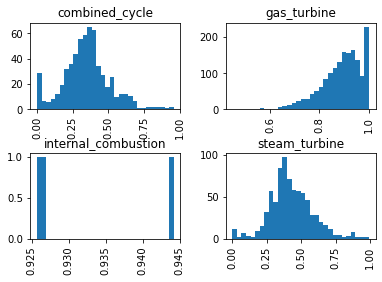

In [24]:
aggs['ramp_factor_max_sum'].hist(bins=30, by=aggs['simple_EIA_UNIT_TYPE'])

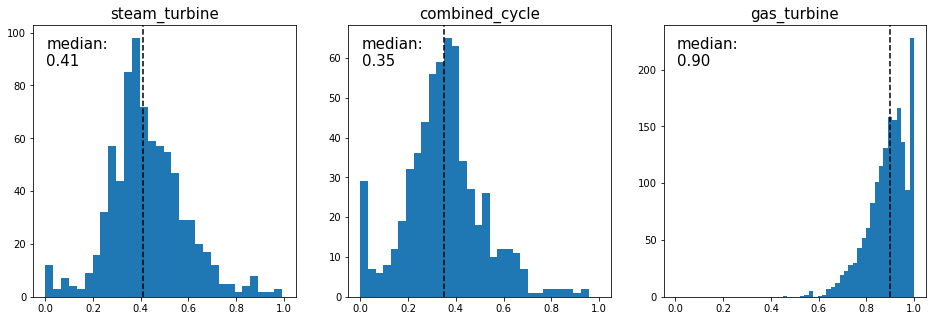

In [37]:
fig, axes = plt.subplots(ncols=3, sharex=True, figsize=(16,5))
for i, unit in enumerate(aggs['simple_EIA_UNIT_TYPE'].unique()):
    if unit == 'internal_combustion':
        continue
    subset = aggs.loc[aggs['simple_EIA_UNIT_TYPE'].eq(unit), 'ramp_factor_max_sum']
    median = subset.median()
    axes[i].hist(subset, bins=30)
    axes[i].set_title(unit, fontsize=15)
    axes[i].axvline(median, ls='--', c='k')
    axes[i].annotate(f'median:\n{median:.2f}', (0.05, 0.85), xycoords='axes fraction', fontsize=15)


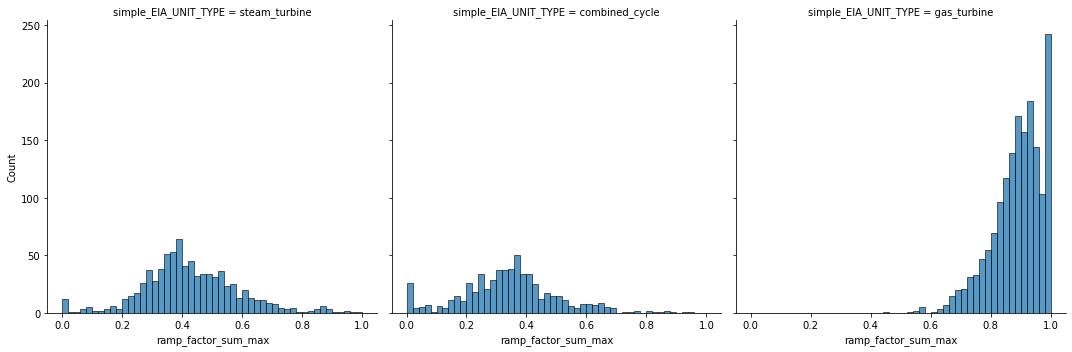

In [21]:
# 1 year
sns.displot(data=aggs.loc[aggs['simple_EIA_UNIT_TYPE'].ne('internal_combustion'),:], x='ramp_factor_sum_max', col='simple_EIA_UNIT_TYPE', bins=50)

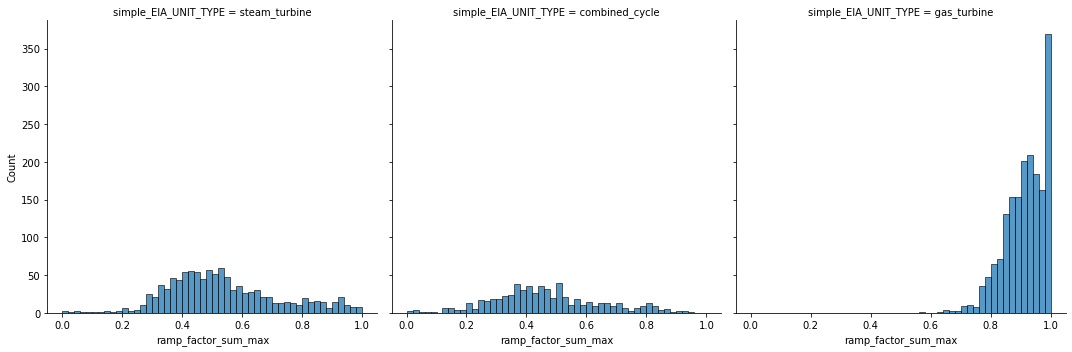

In [12]:
# 5 year
sns.displot(data=aggs.loc[aggs['simple_EIA_UNIT_TYPE'].ne('internal_combustion'),:], x='ramp_factor_sum_max', col='simple_EIA_UNIT_TYPE', bins=50)

In [18]:
# 1 year
aggs.groupby('simple_EIA_UNIT_TYPE')['ramp_factor_sum_max'].describe()

,count,mean,std,min,25%,50%,75%,max
simple_EIA_UNIT_TYPE,,,,,,,,
combined_cycle,606.0,0.347507,0.164115,0.000000,0.254880,0.344024,0.426124,0.956229
gas_turbine,1664.0,0.888563,0.085091,0.448485,0.841945,0.898979,0.953125,1.000000
internal_combustion,3.0,0.932125,0.010431,0.925743,0.926107,0.926471,0.935317,0.944162
steam_turbine,798.0,0.428239,0.159723,0.000000,0.335494,0.408209,0.521556,0.991453


In [13]:
# 5 year
aggs.groupby('simple_EIA_UNIT_TYPE')['ramp_factor_sum_max'].describe()

,count,mean,std,min,25%,50%,75%,max
simple_EIA_UNIT_TYPE,,,,,,,,
combined_cycle,615.0,0.465772,0.178190,0.000000,0.351523,0.447699,0.568173,0.953020
gas_turbine,1822.0,0.913164,0.068967,0.575758,0.869031,0.920635,0.967610,1.000000
internal_combustion,3.0,0.977346,0.019620,0.965854,0.966019,0.966184,0.983092,1.000000
steam_turbine,1058.0,0.538083,0.185827,0.000000,0.408989,0.506199,0.641546,0.996337
